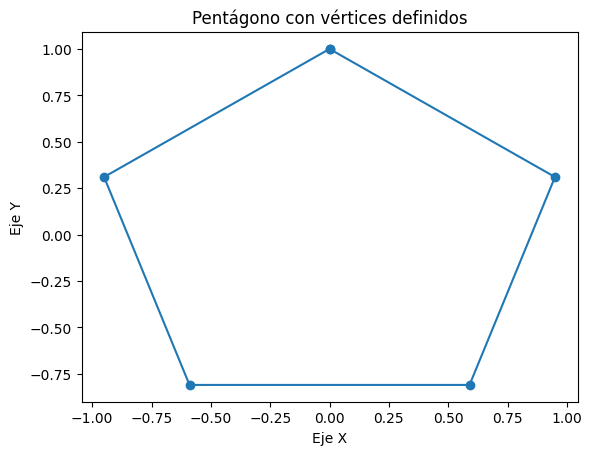

In [ ]:
import matplotlib.pyplot as plt

# Define los vértices del pentágono manualmente
vertices = [(0, 1), (0.95, 0.31), (0.59, -0.81), (-0.59, -0.81), (-0.95, 0.31)]

plt.figure()

# Se añade el primer vértice al final para cerrar el polígono
plt.plot(*zip(*vertices + [vertices[0]]), marker='o', linestyle='-')

plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.title("Pentágono con vértices definidos")

plt.show()

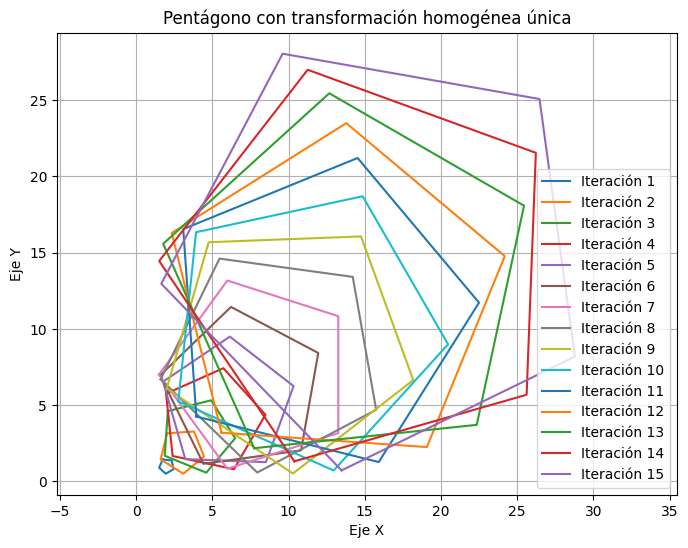

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

vertices = np.array([
    [0, 1],
    [0.95, 0.31],
    [0.59, -0.81],
    [-0.59, -0.81],
    [-0.95, 0.31]
])

vertices_h = np.hstack([vertices, np.ones((vertices.shape[0], 1))])  # (5, 3)

# Parámetros de transformación
sx, sy = 0.5,0.5         # Escala en x e y
theta = np.radians(30)    # Rotación de 30 grados
tx, ty = 2, 1             # Traslación

# Matriz homogénea única que combina escala, rotación y traslación
M = np.array([
    [sx * np.cos(theta), -sy * np.sin(theta), tx],
    [sx * np.sin(theta),  sy * np.cos(theta), ty],
    [0,                  0,                   1 ]
])

# Aplicar la transformación
vertices_transformados = (M @ vertices_h.T).T  # Resultado en (5, 3)

vertices_original = np.vstack([vertices, vertices[0]])
vertices_transformados = np.vstack([vertices_transformados[:, :2], vertices_transformados[0, :2]])

import numpy as np

def transformar_vertices(vertices, sx, sy, theta, tx, ty):
    """
    Aplica una transformación homogénea a un conjunto de vértices y cierra el polígono.

    Args:
        vertices: Una matriz NumPy de forma (n, 2) que contiene las coordenadas (x, y) de los vértices.
        sx, sy: Factores de escala en x e y.
        theta: Ángulo de rotación en radianes.
        tx, ty: Valores de traslación en x e y.

    Returns:
        Una matriz NumPy de forma (n+1, 2) que contiene las coordenadas transformadas de los vértices,
        incluyendo el primer vértice repetido al final para cerrar el polígono.
    """

    # Convertir a coordenadas homogéneas
    vertices_h = np.hstack([vertices, np.ones((vertices.shape[0], 1))])

    M = np.array([
        [sx * np.cos(theta), -sy * np.sin(theta), tx],
        [sx * np.sin(theta), sy * np.cos(theta), ty],
        [0, 0, 1]
    ])

    # Aplicar la transformación
    vertices_transformados = (M @ vertices_h.T).T

    # Cerrar el polígono (agregar el primer punto al final)
    vertices_original = np.vstack([vertices, vertices[0]])
    vertices_transformados = np.vstack([vertices_transformados[:, :2], vertices_transformados[0, :2]])

    # Devolver las coordenadas x e y de los vértices transformados
    return vertices_transformados

# Graficar
plt.figure(figsize=(8, 6))
for i in range(15):
    # Aplica la transformación
    vertices_transformados = transformar_vertices(vertices, sx, sy, theta, tx, ty)

    # Grafica el pentágono transformado
    plt.plot(vertices_transformados[:, 0], vertices_transformados[:, 1], label=f'Iteración {i+1}')

    # Aumenta una unidad para la siguiente iteración
    sx += 1
    sy += 1
    theta += np.radians(10)
    tx += 1
    ty += 1

plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.title("Pentágono con transformación homogénea única")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

# Define los vértices originales
vertices = np.array([
    [0, 1],
    [0.95, 0.31],
    [0.59, -0.81],
    [-0.59, -0.81],
    [-0.95, 0.31]
])

# Parámetros de transformación iniciales
sx, sy = 0.5, 0.5
theta = np.radians(30)
tx, ty = 2, 1

# Crear una lista para almacenar los frames
frames = []

for i in range(15):
    # Aplica la transformación
    vertices_transformados = transformar_vertices(vertices, sx, sy, theta, tx, ty)

    # Crea una figura y grafica el pentágono transformado
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlim([-10, 20])
    ax.set_ylim([-10, 20])
    ax.set_aspect('equal')
    ax.grid(True)
    ax.plot(vertices_transformados[:, 0], vertices_transformados[:, 1], 'ro-', lw=2, label='Pentágono')
    ax.legend()

    # Guarda el frame como una imagen en memoria
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.get_renderer().buffer_rgba(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (4,))  # RGBA, so 4 channels
    frames.append(image)
    plt.close(fig)

    sx += 0.2
    sy += 0.2
    theta += np.radians(10)
    tx += 0.5
    ty += 0.5

# Guarda la animación como un archivo .gif usando imageio
imageio.mimsave("pentagono_transformado.gif", frames, fps=10,loop=0)

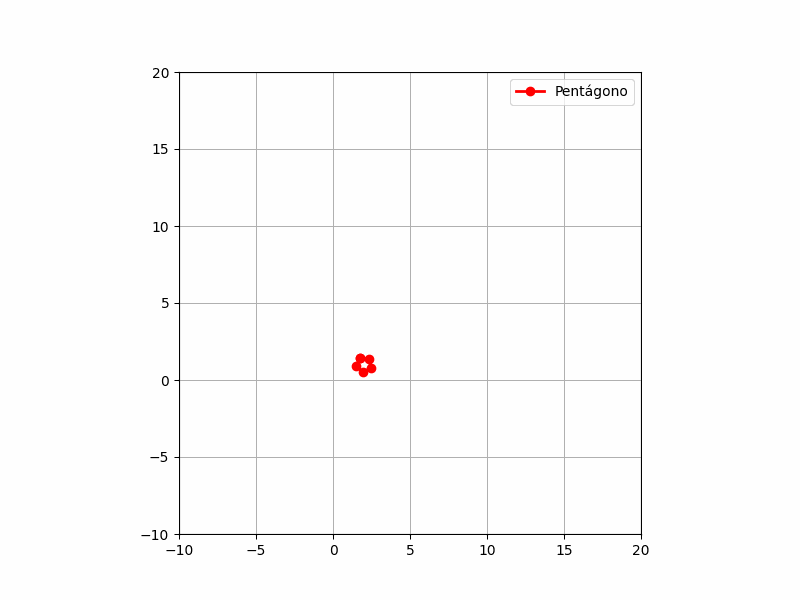

In [ ]:
from IPython.display import Image

# Assuming you saved the animation as "pentagono_transformado.gif"
Image(filename="pentagono_transformado.gif")